In [1]:
# Required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import shap

In [2]:
# 1. Data Generation (Synthetic Data) - Replace this with actual data loading
np.random.seed(0)
num_samples = 1000
data = pd.DataFrame({
    'age': np.random.randint(20, 80, num_samples),
    'bmi': np.random.normal(25, 5, num_samples),
    'blood_pressure': np.random.normal(120, 10, num_samples),
    'smoker': np.random.choice([0, 1], num_samples),
    'exercise_freq_per_week': np.random.randint(0, 5, num_samples),
    'mortality_risk': np.random.choice([0, 1], num_samples, p=[0.7, 0.3])
})

# Features and target
X = data.drop('mortality_risk', axis=1)
y = data['mortality_risk']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:




# 3. Pipeline and Model Selection
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing features
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model selection
best_model = grid_search.best_estimator_




/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Model Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Accuracy: 0.7066666666666667
ROC AUC Score: 0.47341337907375647
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       212
           1       0.00      0.00      0.00        88

    accuracy                           0.71       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.50      0.71      0.59       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


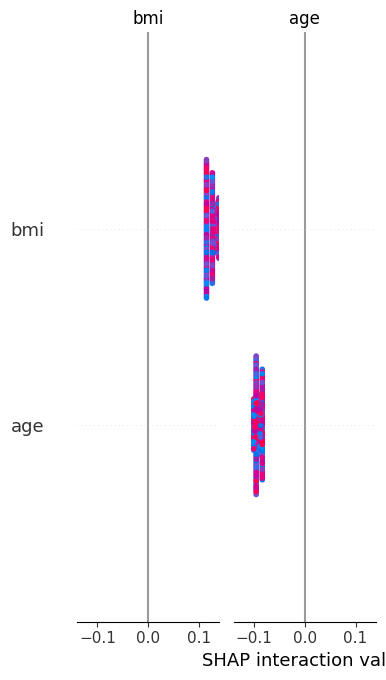

['mortality_risk_model.pkl']

In [6]:
# 4. Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("Best Model Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Model Interpretation with SHAP
explainer = shap.TreeExplainer(best_model.named_steps['classifier'])
shap_values = explainer.shap_values(X_test)

# Check if shap_values is a list (indicating multi-class output)
# Use the mean of absolute SHAP values for global feature importance if multiple classes are present
if isinstance(shap_values, list):
    shap.summary_plot(np.abs(shap_values).mean(axis=0), X_test, feature_names=X_test.columns)
else:
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)



# Saving the model for deployment
import joblib
joblib.dump(best_model, 'mortality_risk_model.pkl')